## Rennes Data Challenge 2023

Mathis Derenne

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("colorblind")
sns.set_style('whitegrid')

### Load Data

In [3]:
df = pd.read_csv('data/data.csv', index_col=0, parse_dates=True)
df.describe()

,btc_tweet_count,eth_tweet_count,bnb_tweet_count,xrp_tweet_count,matic_tweet_count,ada_tweet_count,doge_tweet_count,shib_tweet_count,dot_tweet_count,bch_tweet_count,...,TwitterEcoUncertaintyWGT,TwitterEcoUncertaintySCA,TwitterMktUncertaintyEnglish,TwitterMktUncertaintyUSA,TwitterMktUncertaintyWGT,TwitterMktUncertaintySCA,CDS_ITRXEUE,CDS_ITRXEXE,CDS_ITRXEBE,CDS_ITRXESE
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,...,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1415.000000,1416.000000,1416.000000,1416.000000
mean,599.119699,212.290698,21.877223,86.863885,79.083447,84.733242,51.805404,16.219767,310.467168,22.274282,...,156.496753,68.981185,151.236868,141.661208,148.034685,65.770722,150.154088,321.342468,65.383011,75.507215
std,440.683886,415.573532,27.341379,55.229333,38.013343,55.375218,131.196351,39.182663,385.283207,22.111209,...,132.971654,46.573805,91.475637,114.665565,122.738005,49.792285,43.189099,105.460711,20.490341,23.338375
min,94.000000,8.000000,0.100000,17.000000,11.000000,13.000000,0.100000,0.100000,93.000000,2.000000,...,8.123850,3.556171,14.187092,10.703823,10.006460,3.460951,95.000000,203.665000,41.277000,41.050000
25%,250.000000,52.250000,5.000000,56.000000,55.000000,55.000000,4.000000,1.000000,243.000000,13.000000,...,73.957686,38.655271,93.114628,81.476193,83.569789,39.858194,113.706000,246.796750,50.021750,57.634000
50%,515.000000,87.000000,9.000000,74.000000,71.000000,72.000000,8.000000,2.000000,271.000000,18.000000,...,115.352365,57.075945,130.146403,114.707280,118.505399,54.261908,139.778000,280.116000,57.771000,67.946000
75%,804.000000,352.500000,26.000000,100.750000,93.000000,100.000000,63.000000,23.000000,304.000000,26.000000,...,195.843228,84.047458,185.919553,160.236514,168.519389,74.224427,175.644000,363.452750,75.745250,88.780000
max,4248.000000,13195.000000,237.000000,851.000000,533.000000,764.000000,2269.000000,797.000000,8105.000000,654.000000,...,1153.104065,392.093703,1173.795218,1303.190405,1536.018665,587.930322,351.271000,707.644000,138.549000,165.007000


### EDA

In [4]:
print(f"Data is ranging from {df.index.min()} to {df.index.max()}")
print(f"Data frequency is {pd.infer_freq(df.index)}")
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Data has {len(df.asfreq('D')) - len(df.asfreq('B'))} missing days")

Data is ranging from 2017-08-17 00:00:00 to 2023-03-24 00:00:00
Data frequency is B
Data has 1462 rows and 200 columns
Data has 584 missing days


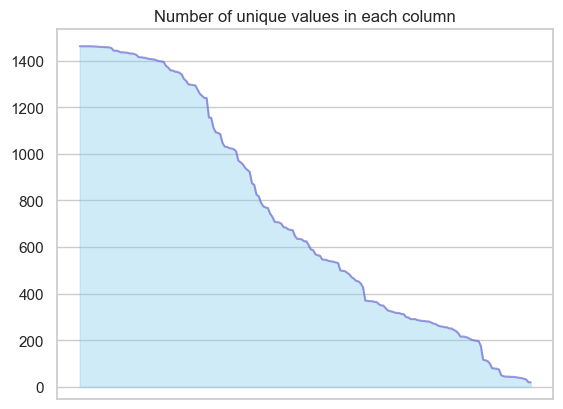

In [5]:
unique_count = df.nunique().sort_values(ascending=False)

plt.fill_between(range(len(unique_count)), unique_count, color="skyblue", alpha=0.4)
plt.plot(unique_count, color="Slateblue", alpha=0.6)

plt.xticks([])
plt.title('Number of unique values in each column');

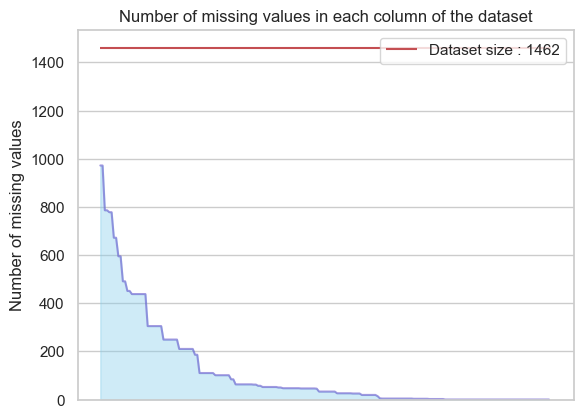

In [6]:
na_count = df.isnull().sum().sort_values(ascending=False)

plt.fill_between(range(len(na_count)), na_count, color="skyblue", alpha=0.4)
plt.plot(na_count, color="Slateblue", alpha=0.6)

plt.xticks([])
plt.ylabel('Number of missing values')

total_rows = df.shape[0]
plt.hlines(total_rows, 0, df.shape[1], colors= 'r', label = f"Dataset size : {total_rows}")
plt.title('Number of missing values in each column of the dataset')
plt.legend()
plt.ylim(bottom=0);

In [28]:
# Is there infinite values in the dataset?
infinite_count = df.isin([np.inf, -np.inf]).sum().sort_values(ascending=False)

### Correlation matrix

Close_DOT                  0.951785
Close_ETH                  0.924357
NASDAQComposite            0.895765
Close_BNB                  0.884373
SP500                      0.873143
Close_ADA                  0.856228
Close_XRP                  0.793688
Close_DOGE                 0.749696
InflationBreakevenT5YIE    0.728321
doge_posts_count           0.720290
Name: Close_BTC, dtype: float64

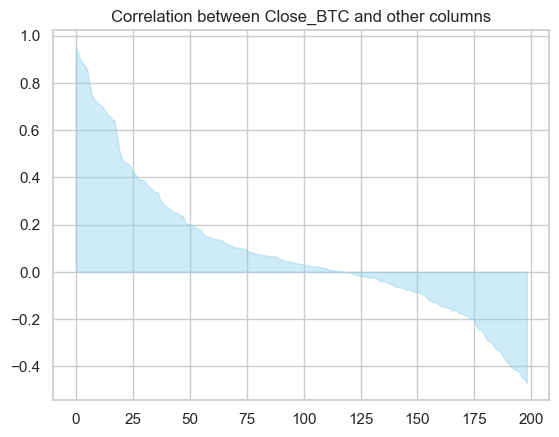

In [7]:
# Correlation between Close_BTC and others columns 
correlation = df.corr()['Close_BTC'].sort_values(ascending=False)
correlation = correlation.drop('Close_BTC')

plt.fill_between(range(len(correlation)), correlation, color="skyblue", alpha=0.4)
plt.title('Correlation between Close_BTC and other columns');

correlation.head(10)

### PCA Cumulative explained variance plot

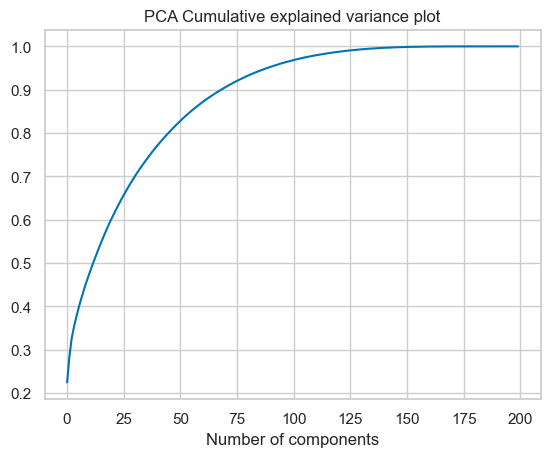

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.dropna())

pca = PCA()
pca.fit(df_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.title('PCA Cumulative explained variance plot');

### Seasonality

/Users/mathisderenne/GitHub/00 - Inactive/rennesdatachallenge/DataChallenge2023/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
18:04:18 - cmdstanpy - INFO - Chain [1] start processing
18:04:19 - cmdstanpy - INFO - Chain [1] done processing
/Users/mathisderenne/GitHub/00 - Inactive/rennesdatachallenge/DataChallenge2023/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mathisderenne/GitHub/00 - Inactive/rennesdatachallenge/DataChallenge2023/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of Da

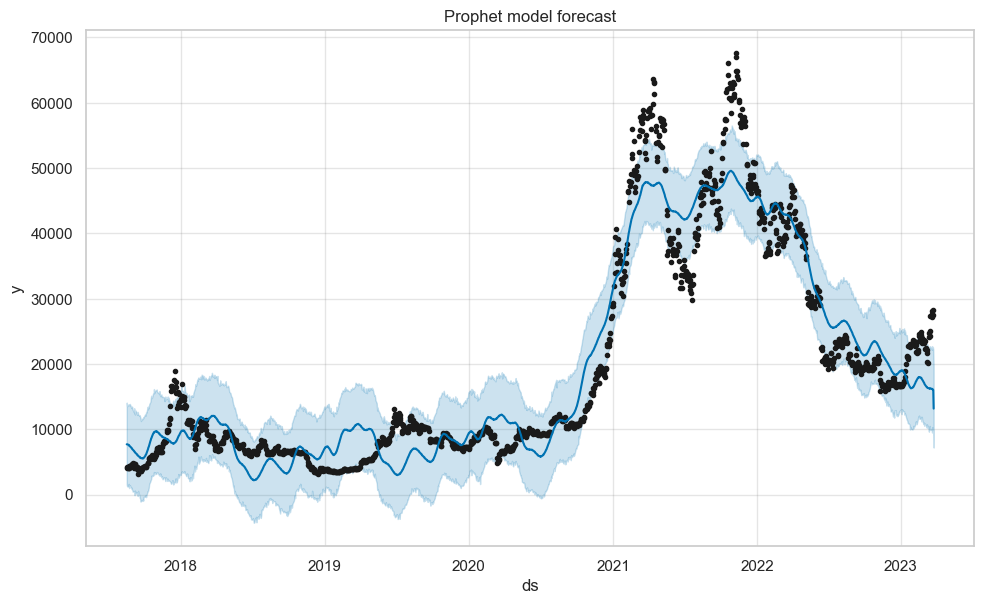

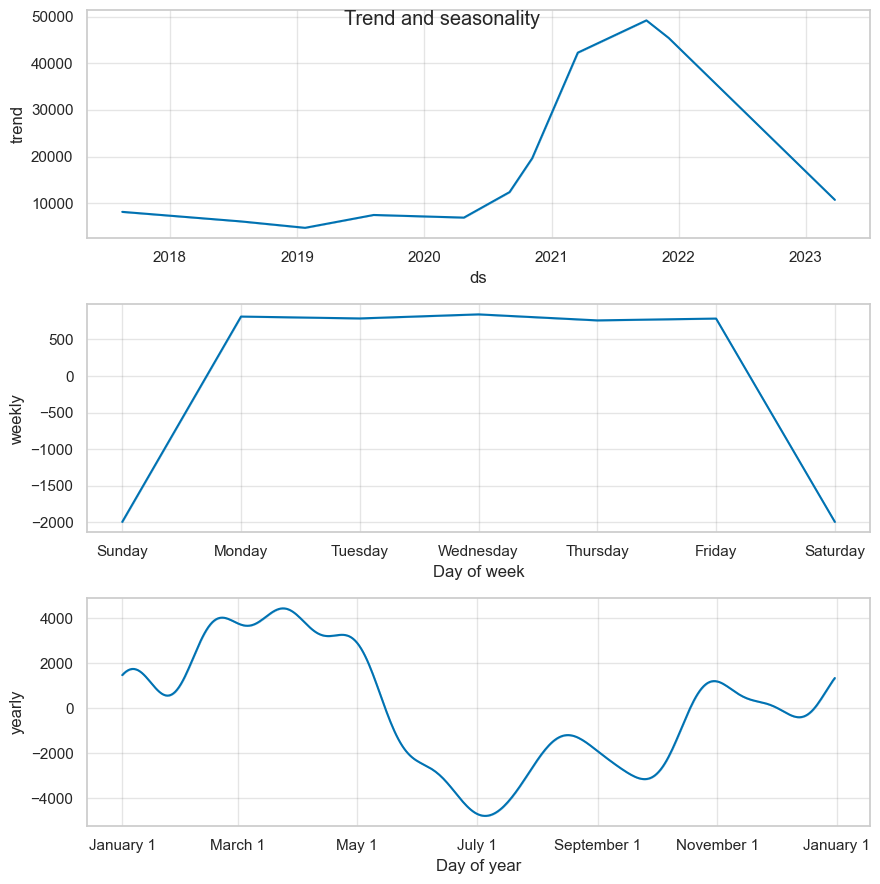

In [9]:
# Plot seasonality using Prophet
from prophet import Prophet

df_prophet = df.reset_index().rename(columns={'date': 'ds', 'Close_BTC': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=1)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Prophet model forecast');

fig = model.plot_components(forecast)
plt.suptitle('Trend and seasonality');

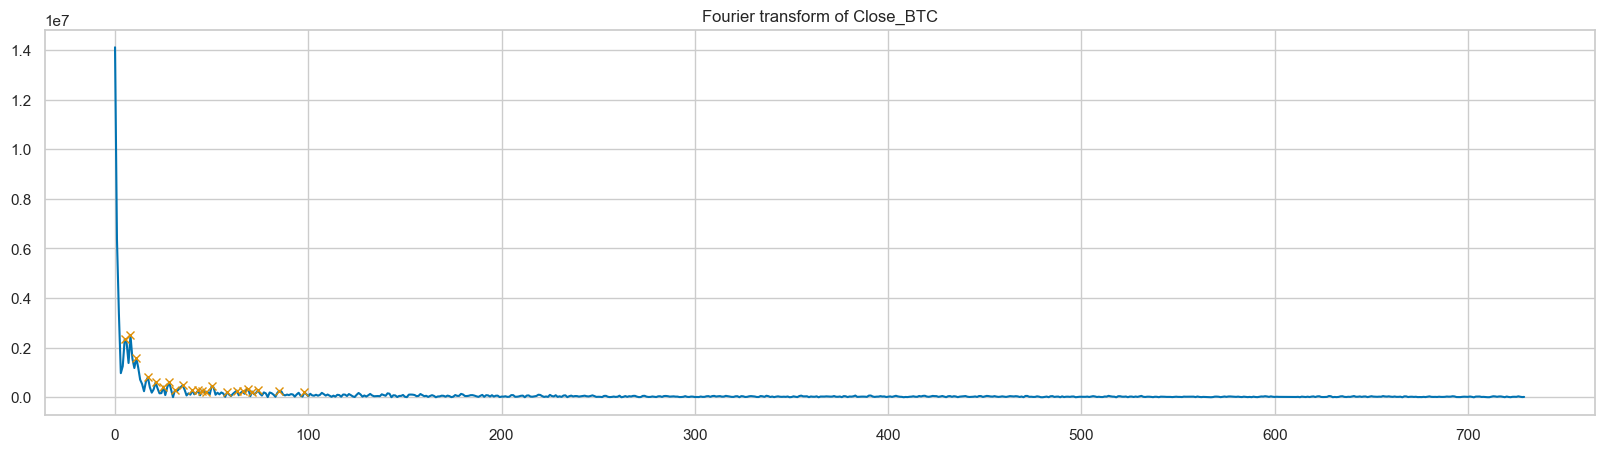

In [10]:
# Seasonality analysis using Fourrier transform
from scipy.fft import fft
from scipy.signal import find_peaks

close_fft = fft(df['Close_BTC'].values)
fft_values = np.abs(close_fft)
fft_values = fft_values[1:int(len(fft_values)/2)]
peaks, _ = find_peaks(fft_values, height=0.2e6)

fig = plt.figure(figsize=(20, 5))
plt.plot(fft_values)
plt.plot(peaks, fft_values[peaks], "x")
plt.title('Fourier transform of Close_BTC');

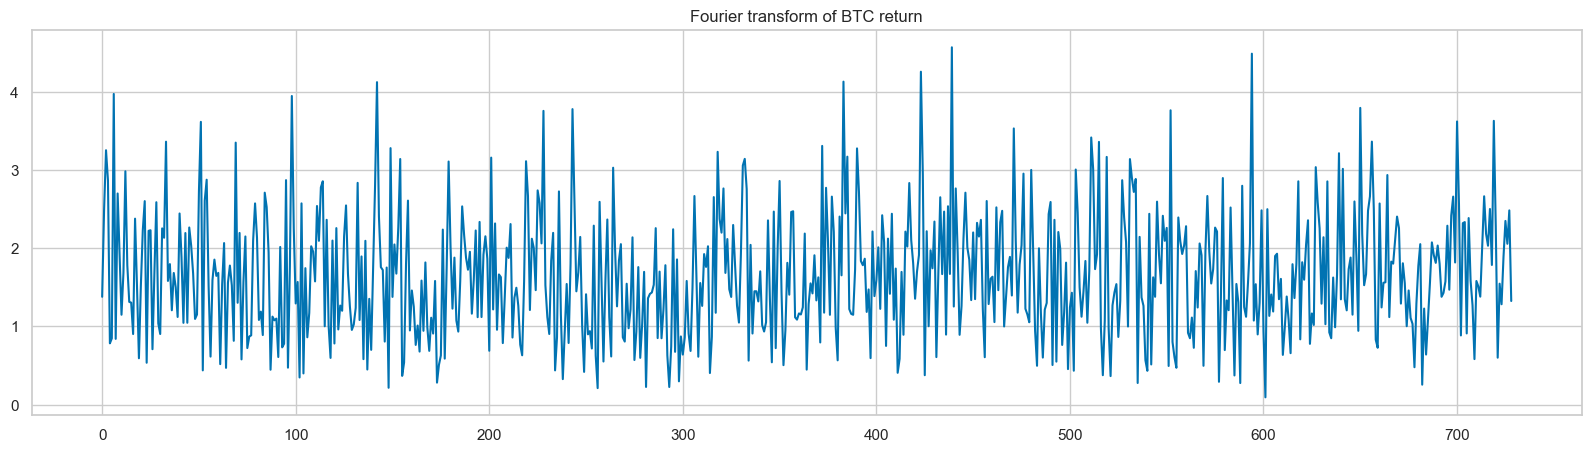

In [11]:
# Seasonality analysis using Fourrier transform on BTC return
BTC_return = np.log(df['Close_BTC']) - np.log(df['Close_BTC'].shift(1))
BTC_return = BTC_return.iloc[1:].values

return_fft = fft(BTC_return)
fft_values = np.abs(return_fft)
fft_values = fft_values[1:int(len(fft_values)/2)]
peaks, _ = find_peaks(fft_values, height=1000)

fig = plt.figure(figsize=(20, 5))
plt.plot(fft_values)
plt.plot(peaks, fft_values[peaks], "x")
plt.title('Fourier transform of BTC return');

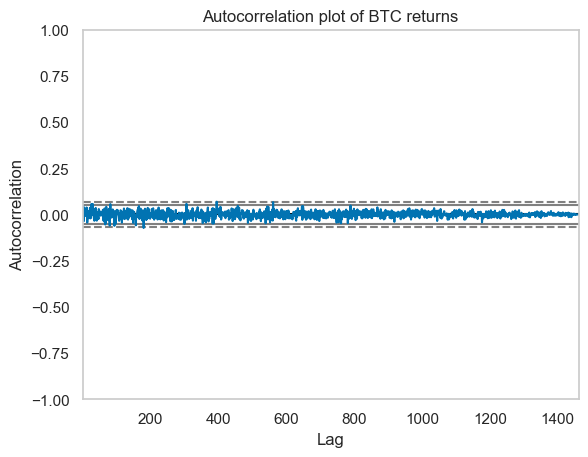

In [12]:
# Plot autocorrelation of BTC returns
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(BTC_return)
plt.title('Autocorrelation plot of BTC returns');

In [20]:
# Test de stationnarité
from statsmodels.tsa.stattools import adfuller

# Sur Close_BTC
result = adfuller(df['Close_BTC'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Sur BTC_return
result = adfuller(BTC_return)
print(f'ADF Statistic: {result[0]}')

print('\n Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# We must reject null hypothesis of stationarity for Close_BTC
# However BTC_return is stationary

ADF Statistic: -1.5027377483423172
p-value: 0.5321565818140054
ADF Statistic: -20.966769295659873

 Critical Values:
	1%: -3.434843038681996
	5%: -2.8635243777871286
	10%: -2.56782646544019


<Axes: xlabel='Close_BTC', ylabel='Count'>

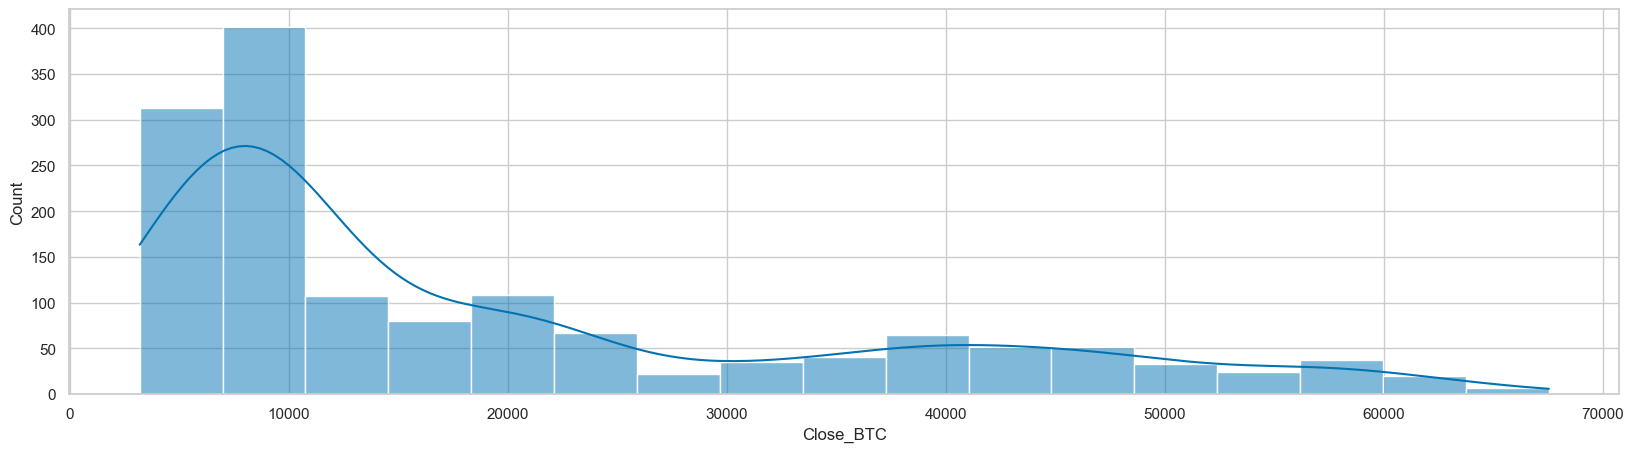

In [21]:
# Close_BTC distribution
fig = plt.figure(figsize=(20, 5))
sns.histplot(df['Close_BTC'], kde=True)

<Axes: ylabel='Count'>

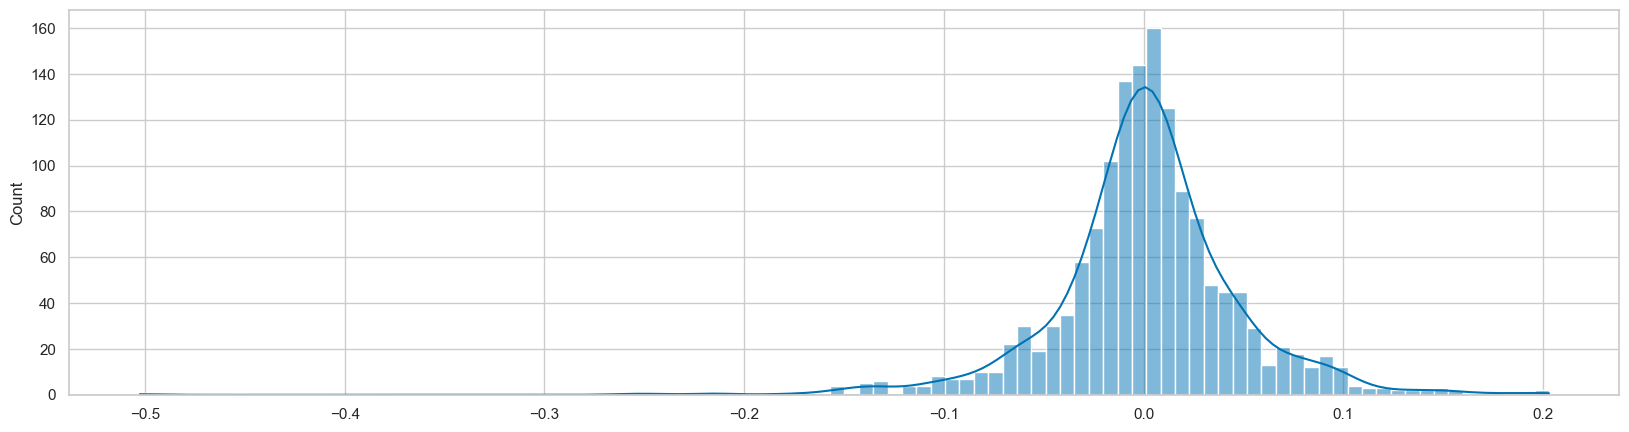

In [ ]:
# BTC_return distribution
fig = plt.figure(figsize=(20, 5))
sns.histplot(BTC_return, kde=True);

In [ ]:
# Is BTC_return normally distributed ?
from scipy.stats import shapiro

stat, p = shapiro(BTC_return)
print(f'Statistics={stat}, p={p}')
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# We can make the assumption that BTC_return is normally distributed

Statistics=0.9105120688559787, p=1.7524637123749782e-28
Sample does not look Gaussian (reject H0)
